<a href="https://colab.research.google.com/github/joseGjr/intelligenceA/blob/main/pratica29_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [68]:
df = pd.read_csv('IMBD-Movie-Data.csv')

In [9]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [10]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [69]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [70]:
df.columns = [col.lower() for col in df.columns]
df.rename(columns = {'runtime (minutes)':'runtime_minutes','revenue (millions)':'revenue_millions'},inplace = True)

In [71]:
display(df.shape)

(1000, 12)

In [72]:
df.columns = [col.lower() for col in df.columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   title             1000 non-null   object 
 2   genre             1000 non-null   object 
 3   description       1000 non-null   object 
 4   director          1000 non-null   object 
 5   actors            1000 non-null   object 
 6   year              1000 non-null   int64  
 7   runtime_minutes   1000 non-null   int64  
 8   rating            1000 non-null   float64
 9   votes             1000 non-null   int64  
 10  revenue_millions  872 non-null    float64
 11  metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [74]:
df.describe()

,rank,year,runtime_minutes,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [75]:
df.head()

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [80]:
df['teste'] = df['revenue_millions']/df['runtime_minutes']

In [85]:
from numpy import true_divide
df[['genre_1','genre_2','genre_3']] = df['genre'].str.split(',',expand = True)
df[['actor_1','actor_2','actor_3','actor_4']]= df['actors'].str.split(',',expand=True)

In [92]:
set(df ['genre_2'].unique().tolist()+df['genre_3'].unique().tolist())

{'Action',
 'Adventure',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 None,
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [93]:
df ['genre_1'].value_counts()# quantidade de vezes que o genero aparece

Action       293
Drama        195
Comedy       175
Adventure     75
Crime         71
Biography     64
Animation     49
Horror        46
Mystery       13
Thriller      10
Fantasy        4
Sci-Fi         3
Romance        2
Name: genre_1, dtype: int64

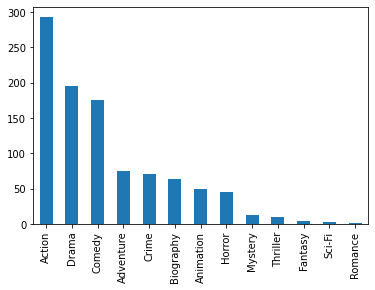

In [97]:
df['genre_1'].value_counts().plot(kind = 'bar')

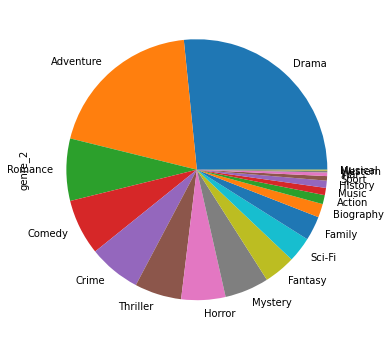

In [103]:
df['genre_2'].value_counts().plot(kind = 'pie', figsize = (12,6))#percentual com grafico e tamanho

In [104]:
pd.crosstab(df['genre_1'],df['genre_2'])#cruzamento de informações

genre_2,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
genre_1,,,,,,,,,,,,,,,,,,,
Action,0,146,9,30,35,28,0,6,0,11,0,0,6,0,10,0,10,0,0
Adventure,0,0,6,18,1,22,15,4,0,3,0,0,2,0,3,0,0,0,0
Animation,10,29,0,6,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,8,9,46,0,0,1,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,13,76,8,6,0,6,3,0,1,28,1,0,0,0,1
Crime,0,0,0,0,0,64,0,0,0,4,0,0,2,0,0,0,1,0,0
Drama,0,0,0,0,0,0,3,18,7,22,5,1,21,39,6,5,16,3,1
Fantasy,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0
Horror,0,0,0,0,0,0,0,0,0,0,0,0,16,0,3,0,16,0,0


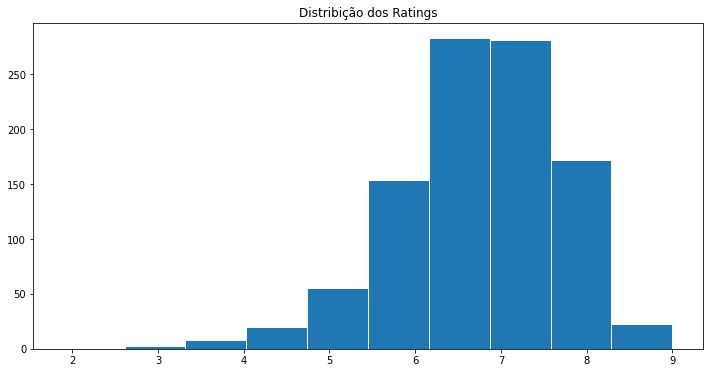

In [108]:
from pandas.io.formats.style import plt
df['rating'].hist(edgecolor = 'white',figsize = (12,6))
plt.title('Distribição dos Ratings')
plt.grid(False)

In [ ]:

df['rating'].hist(edgecolor = 'white',figsize = (12,6))
plt.title('Distribição dos Ratings')
plt.grid(False)